# Principal component analysis aka PCA

Applying PCA on MNIST dataset which is 28X28 image of handwritten digits(60K)

In [3]:
from sklearn import datasets
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import sqlite3
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from scipy.linalg import eigh #linalg:linear algebra
%matplotlib inline


In [7]:
d0=pd.read_csv('mnist_train.csv')
print(d0.shape)
l=d0['label']
d=d0.drop('label',axis=1)

(42000, 785)


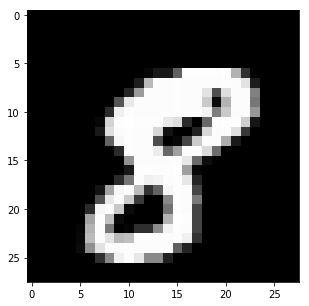

8

In [8]:
#picture image
plt.figure(figsize=(5,5))
v=10
plt.imshow(d.iloc[v].as_matrix().reshape(28,28),cmap='gray')
plt.show()
l[10]

Steps for PCA


1.Column standardization 

2.Compute covariance matrix


3.Get Eigen vector and eigen values



4.Select directions with maximum variance

In [14]:
#STEP 1:Column standardization 
sd=StandardScaler().fit_transform(d)
#STEP 2: Compute Co-variance matrix
cv=np.dot(sd.T,sd)/42000
#STEP 3:Eigen Values and Eigen Vectors
ev,evec=eigh(cv,eigvals=(782,783))  #total 748 eigen values (0,1,2,....783) from which we need to select max and second max
#STEP 4:Calculate x'
xdash=np.dot(d,evec)
#END
f=pd.DataFrame(xdash,columns=['1st_principal','2nd_principal'])
data=pd.concat([f,l],axis=1)
data

,1st_principal,2nd_principal,label
0,-540.331669,122.904004,1
1,339.624235,2318.125463,0
2,-261.521516,-112.964529,1
3,304.388819,539.841540,4
4,300.353405,2734.887930,0
5,-141.059388,832.152417,0
6,378.914765,24.350481,7
7,217.714752,561.179554,3
8,-184.288678,626.268108,5
9,-365.997389,883.033081,3


You can see 784 dimensions data is now repesented by 2 dimensions only

# Visualization

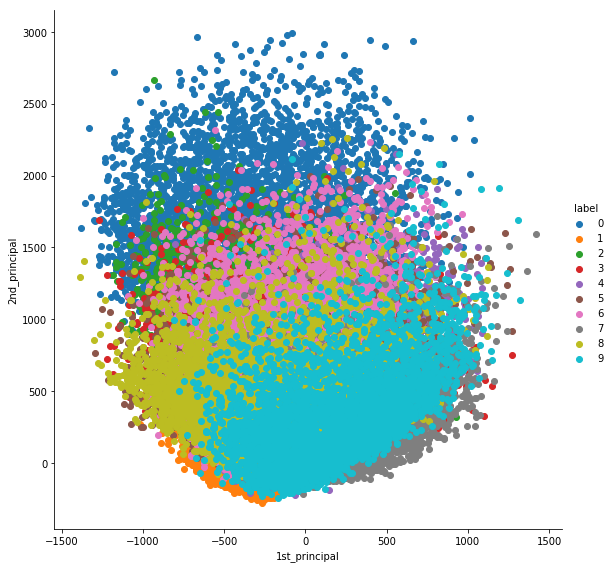

In [16]:
sns.FacetGrid(data,hue='label',height=8).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA by using Python functions

In [18]:
#All Steps can be performed by scikit-learn
pca=decomposition.PCA()
pca.n_components=2  #need two directions only
data_dash=pca.fit_transform(d)
f=pd.DataFrame(data_dash,columns=['1st_principal','2nd_principal'])
data=pd.concat([f,l],axis=1) 
data

,1st_principal,2nd_principal,label
0,-661.594420,-699.321707,1
1,1701.449939,-360.517451,0
2,-886.894833,-293.762861,1
3,-165.756737,300.204236,4
4,1923.709020,-449.139138,0
5,487.749942,192.781923,0
6,-672.322307,464.796812,7
7,-114.380317,-20.741681,3
8,350.229460,141.011272,5
9,297.391567,-807.408528,3


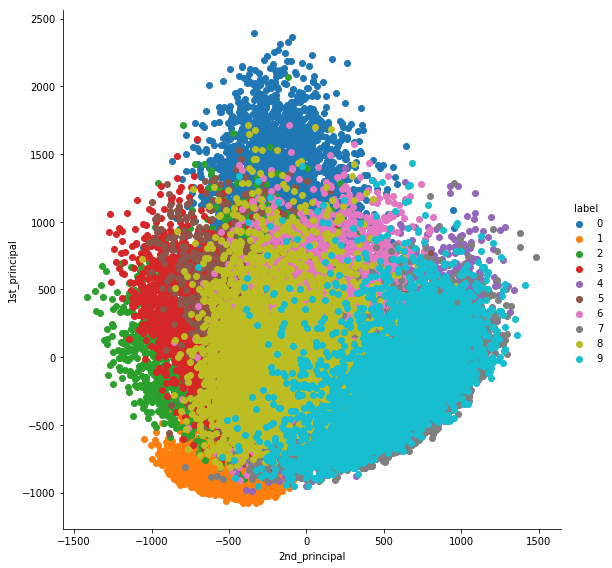

In [19]:
sns.FacetGrid(data,hue='label',height=8).map(plt.scatter,'2nd_principal','1st_principal').add_legend()
plt.show()